### Importing required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import re
from datetime import datetime
import matplotlib.pyplot as plt 
import transformers
import torch

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
vid_data = pd.read_csv('dataset_datahack_videos.csv')
channel_data = pd.read_csv('dataset_datahack_channels.csv')

In [3]:
vid_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace = True)
vid_data.head()

,index,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,thumbnail,topic_categories,Comments
0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",PT18M59S,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...
1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",PT3M28S,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",PT13M28S,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",..."
3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT12M50S,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...
4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",PT16M7S,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...


In [4]:
vid_data.columns.values[9] = 'no_of_comments'
vid_data

,index,video_id,title,description,category_id,tags,duration,view_count,likes,no_of_comments,upload_time,channel_title,thumbnail,topic_categories,Comments
0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",PT18M59S,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...
1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",PT3M28S,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",PT13M28S,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",..."
3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT12M50S,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...
4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",PT16M7S,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,742,r6C1nf_iz3o,"""Tell me about Yourself"" ka SABSE SAHI Answer","Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",PT59S,2351,185,0,2023-02-21T12:57:44Z,Ishaan Arora,{'url': 'https://i.ytimg.com/vi/r6C1nf_iz3o/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""Hello Everyone, My Name is Ishaan Arora.I'm ..."
467,743,515fPTbB-2o,Is 2023 the BEST YEAR to START UP? | Antler In...,Get my new book ‘GET EPIC SHIT DONE’ here: htt...,27,"['warikoo', 'ankur warikoo', 'Ankur Warikoo mo...",PT32M10S,38969,1245,182,2023-03-16T14:30:01Z,warikoo,{'url': 'https://i.ytimg.com/vi/515fPTbB-2o/de...,"['https://en.wikipedia.org/wiki/Business', 'ht...",['Get my new book ‘GET EPIC SHIT DONE’ here: h...
468,745,rJd57wSoxs8,Top 4 Reasons To Learn Personal Finance | Wome...,✔️ Invest in Knowledge: https://social.rachana...,27,"['CA Rachana Ranade', 'stock market basics', '...",PT9M,34971,1451,80,2023-03-05T08:30:18Z,CA Rachana Phadke Ranade,{'url': 'https://i.ytimg.com/vi/rJd57wSoxs8/de...,['https://en.wikipedia.org/wiki/Society'],['I showed this video to my spouse. She is hap...
469,747,sVte67QEAvU,Mummy ka Vlog TRENDING pe le aao!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT13M58S,584614,40702,1493,2023-03-27T06:30:41Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/sVte67QEAvU/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['Mother-Daugher love is pure... both of you l...


In [5]:
vid_data.describe()

,index,category_id,view_count,likes,no_of_comments
count,471.000000,471.000000,4.710000e+02,4.710000e+02,471.000000
mean,368.403397,21.690021,4.160666e+05,2.816723e+04,1044.980892
std,217.156142,6.563397,1.468884e+06,9.570029e+04,4052.111855
min,0.000000,1.000000,3.000000e+00,0.000000e+00,0.000000
25%,181.500000,20.000000,3.014000e+03,1.555000e+02,15.500000
50%,369.000000,23.000000,5.448900e+04,2.726000e+03,135.000000
75%,547.500000,27.000000,3.012735e+05,2.142050e+04,829.000000
max,748.000000,27.000000,1.654122e+07,1.081179e+06,54074.000000


In [6]:
col_names_vid = channel_data.columns

In [7]:
col_names_vid

Index(['Unnamed: 0.1', 'Unnamed: 0', 'channel_id', 'channel_title',
       'description', 'view_count', 'subscriber_count', 'video_count',
       'created_time', 'uploads', 'other_links'],
      dtype='object')

In [8]:
channel_data.head()

,Unnamed: 0.1,Unnamed: 0,channel_id,channel_title,description,view_count,subscriber_count,video_count,created_time,uploads,other_links
0,0,0,UCn_l37ETRGxVsVqPAZM-y7w,Onkiify,Ahoy! Gamers What is Up it's your Boi Onkiify....,1443714,4820,193,2017-05-18T17:27:05Z,UUn_l37ETRGxVsVqPAZM-y7w,['https://www.youtube.com/redirect?event=chann...
1,1,1,UCg3811K2k6ZW0T9wrUyq7UQ,Boyzz World Gaming,Sup Guys\n I'm just a Weirdo W...,761326,1690,196,2020-09-07T06:42:54.28756Z,UUg3811K2k6ZW0T9wrUyq7UQ,['https://www.youtube.com/redirect?event=chann...
2,2,2,UCO1-i4iqe_Kg0B-nwt5W0Gg,Majnu Gaming,"Hello Gamer's 😍\n\nHello Family, \nMera Name H...",290799,4690,468,2021-05-28T08:27:39.183399Z,UUO1-i4iqe_Kg0B-nwt5W0Gg,['https://www.youtube.com/redirect?event=chann...
3,3,3,UC6AhmVhClcDx2RPsFFw_fAA,SELEM YT,\nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...,6427859,133000,339,2021-03-03T00:59:54.797482Z,UU6AhmVhClcDx2RPsFFw_fAA,[]
4,4,4,UC5v-gTzCpaY257sxx-8P_-Q,Paglaa Tech,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184,2016-05-16T16:06:36Z,UU5v-gTzCpaY257sxx-8P_-Q,[]


In [9]:
channel_data.describe()

,Unnamed: 0.1,Unnamed: 0,view_count,subscriber_count,video_count
count,50.00000,50.00000,5.000000e+01,5.000000e+01,50.000000
mean,24.50000,24.50000,2.181422e+08,1.178518e+06,661.340000
std,14.57738,14.57738,3.750396e+08,1.417683e+06,1264.353616
min,0.00000,0.00000,5.141000e+03,4.500000e+01,16.000000
25%,12.25000,12.25000,5.733671e+06,9.060000e+04,148.000000
50%,24.50000,24.50000,5.764319e+07,5.055000e+05,300.000000
75%,36.75000,36.75000,2.971037e+08,1.780000e+06,869.250000
max,49.00000,49.00000,1.975052e+09,5.110000e+06,8777.000000


In [10]:
channel_data_cols = vid_data.columns

In [11]:
channel_data_cols

Index(['index', 'video_id', 'title', 'description', 'category_id', 'tags',
       'duration', 'view_count', 'likes', 'no_of_comments', 'upload_time',
       'channel_title', 'thumbnail', 'topic_categories', 'Comments'],
      dtype='object')

In [12]:
# Sample comment
comment = "I love this movie! 😍❤️"

# Removing emoticons, symbols & pictographs, transport & map symbols, flags (iOS) from comment
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF" 
                           "]+", flags=re.UNICODE)
comment = emoji_pattern.sub(r'', comment)

print(comment)

I love this movie! ❤️


In [13]:
description_col = channel_data.loc[:,"description"]
description_col

0     Ahoy! Gamers What is Up it's your Boi Onkiify....
1     Sup Guys\n                 I'm just a Weirdo W...
2     Hello Gamer's 😍\n\nHello Family, \nMera Name H...
3     \nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...
4     1000 subscribers - 31/12/2021\n10000 subscribe...
5     Hi guys I am Prabhat from Uttarakhand❤️\n🎬This...
6     So Hey Guys...!\nSUBHAM HORE Hare And Welcome ...
7     🔔🔔 bell all pe set karlo 🔔🔔plz\n❤️My name =Ani...
8     Actors Funny Motivational Video Creator, Short...
9     हँसते रहो हँसाते रहो बस हमारा यही एक प्रयास है...
10    Hey, This is Jentilal and welcome to my Youtub...
11    Official Channel Of AG! \nTwo Brother From ano...
12    Comedian Vikas thakur from shimla Himachal par...
13                                                  NaN
14    Watch awesome content created across categorie...
15    This channel is dedicated to providing quality...
16    This channel is all about Competitive Programm...
17    Gate Smashers is India's no 1 Free educati

In [16]:
# Sample text data
text = "👍 This is a 👌 test 🙌"

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002702-\U000027B0" 
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
text = emoji_pattern.sub(r'', text)

print(text)

 This is a  test 


In [17]:
channel_data['description'] = channel_data['description'].astype(str)

# Print the result
print(channel_data)

    Unnamed: 0.1  Unnamed: 0                channel_id  \
0              0           0  UCn_l37ETRGxVsVqPAZM-y7w   
1              1           1  UCg3811K2k6ZW0T9wrUyq7UQ   
2              2           2  UCO1-i4iqe_Kg0B-nwt5W0Gg   
3              3           3  UC6AhmVhClcDx2RPsFFw_fAA   
4              4           4  UC5v-gTzCpaY257sxx-8P_-Q   
5              5           5  UCHOrSFKttbAKpcyjnBfVqkw   
6              6           6  UCQRSY8W2A1DST5qtm8NNhMA   
7              7           7  UC2IuURiiASwNigfQJtXiRdQ   
8              8           8  UC8k6b-QBPW79SOvO4C9hBOQ   
9              9           9  UCo-61NMiPlPP6er3I9AcDvw   
10            10          10  UCmVATZGddUN9Xj4NLoSzYcw   
11            11          11  UCNzn3WhDLAfulMSzFzqhqTw   
12            12          12  UCLHAyQ3M3Y-GWF3Pov1mFfw   
13            13          13  UCY5pmgVzfxBXHBjnRnP-alQ   
14            14          14  UC1_-cyLlwnmTAesbMgruDpQ   
15            15          15  UC9cpGw2hVv-6G-76HO22jQg   
16            

In [19]:
# Extract emojis from column 'col'
channel_data['emojis'] = channel_data['description'].apply(lambda x: emoji_pattern.findall(x))

# Remove emojis from column 'col'
channel_data['clean_col'] = channel_data['description'].apply(lambda x: emoji_pattern.sub(r'', x))

# Print the result
print(channel_data)


    Unnamed: 0.1  Unnamed: 0                channel_id  \
0              0           0  UCn_l37ETRGxVsVqPAZM-y7w   
1              1           1  UCg3811K2k6ZW0T9wrUyq7UQ   
2              2           2  UCO1-i4iqe_Kg0B-nwt5W0Gg   
3              3           3  UC6AhmVhClcDx2RPsFFw_fAA   
4              4           4  UC5v-gTzCpaY257sxx-8P_-Q   
5              5           5  UCHOrSFKttbAKpcyjnBfVqkw   
6              6           6  UCQRSY8W2A1DST5qtm8NNhMA   
7              7           7  UC2IuURiiASwNigfQJtXiRdQ   
8              8           8  UC8k6b-QBPW79SOvO4C9hBOQ   
9              9           9  UCo-61NMiPlPP6er3I9AcDvw   
10            10          10  UCmVATZGddUN9Xj4NLoSzYcw   
11            11          11  UCNzn3WhDLAfulMSzFzqhqTw   
12            12          12  UCLHAyQ3M3Y-GWF3Pov1mFfw   
13            13          13  UCY5pmgVzfxBXHBjnRnP-alQ   
14            14          14  UC1_-cyLlwnmTAesbMgruDpQ   
15            15          15  UC9cpGw2hVv-6G-76HO22jQg   
16            

In [20]:
channel_data['description']

0     Ahoy! Gamers What is Up it's your Boi Onkiify....
1     Sup Guys\n                 I'm just a Weirdo W...
2     Hello Gamer's 😍\n\nHello Family, \nMera Name H...
3     \nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...
4     1000 subscribers - 31/12/2021\n10000 subscribe...
5     Hi guys I am Prabhat from Uttarakhand❤️\n🎬This...
6     So Hey Guys...!\nSUBHAM HORE Hare And Welcome ...
7     🔔🔔 bell all pe set karlo 🔔🔔plz\n❤️My name =Ani...
8     Actors Funny Motivational Video Creator, Short...
9     हँसते रहो हँसाते रहो बस हमारा यही एक प्रयास है...
10    Hey, This is Jentilal and welcome to my Youtub...
11    Official Channel Of AG! \nTwo Brother From ano...
12    Comedian Vikas thakur from shimla Himachal par...
13                                                  nan
14    Watch awesome content created across categorie...
15    This channel is dedicated to providing quality...
16    This channel is all about Competitive Programm...
17    Gate Smashers is India's no 1 Free educati

In [ ]:
#problem 2 
# aim to create an upload schedule 
#

In [50]:
vid_data['upload_time']

0      2023-03-10T09:32:59Z
1      2023-03-29T06:30:09Z
2      2023-03-26T05:16:10Z
3      2023-03-04T07:45:08Z
4      2023-03-12T07:50:52Z
               ...         
466    2023-02-21T12:57:44Z
467    2023-03-16T14:30:01Z
468    2023-03-05T08:30:18Z
469    2023-03-27T06:30:41Z
470    2023-03-11T20:02:43Z
Name: upload_time, Length: 471, dtype: object

#conversion of date time 


In [21]:
vid_data['upload_time'] = pd.to_datetime(vid_data['upload_time'], format='%Y-%m-%dT%H:%M:%SZ')
vid_data['year'] = vid_data['upload_time'].dt.year
vid_data['month'] = vid_data['upload_time'].dt.month
vid_data['day'] = vid_data['upload_time'].dt.day
print(vid_data)

     index     video_id                                              title  \
0        0  -gJ1a4qzO58  Adopted by the SMALLEST FAMILY in Minecraft! (...   
1        2  XbIegQ5v334  I started playing chess when I was three years...   
2        5  bTo4s27L1Uw  #1 How @BBKiVines become 1 of India’s RICHEST ...   
3        6  iEtjePI_sqc                         Mere paas SABOOT nahi hai!   
4        8  gSYT7WSfekk  The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...   
..     ...          ...                                                ...   
466    742  r6C1nf_iz3o      "Tell me about Yourself" ka SABSE SAHI Answer   
467    743  515fPTbB-2o  Is 2023 the BEST YEAR to START UP? | Antler In...   
468    745  rJd57wSoxs8  Top 4 Reasons To Learn Personal Finance | Wome...   
469    747  sVte67QEAvU                  Mummy ka Vlog TRENDING pe le aao!   
470    748  yV49JQ7d6-4                   Dominate 3.0 with OnePlus 11R 5G   

                                           description  categor

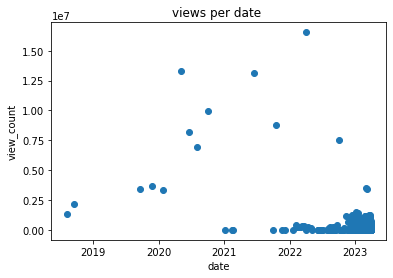

In [22]:
y = vid_data['view_count']
x = vid_data['upload_time']

plt.scatter(x, y)
plt.xlabel('date')
plt.ylabel('view_count')
plt.title('views per date ')

plt.show()

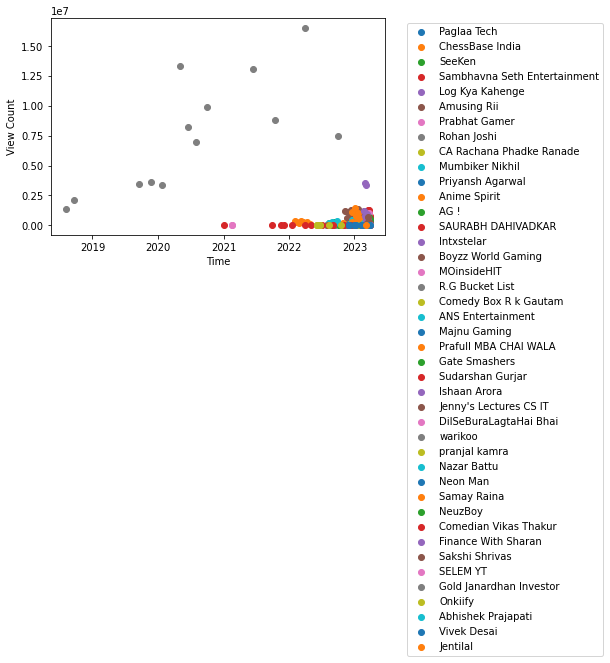

In [23]:
import matplotlib.pyplot as plt

# Get unique user profiles
user_profiles = vid_data['channel_title'].unique()

# Plot view count vs time for each user profile
for profile in user_profiles:
    subset = vid_data[vid_data['channel_title'] == profile]
    plt.scatter(subset['upload_time'], subset['view_count'], label=profile)

subset = vid_data[vid_data['channel_title'] == user_profiles[1]]
plt.xlabel('Time')
plt.ylabel('View Count')
plt.legend(bbox_to_anchor=(1.05, 1.0))

# Show plot
plt.show()

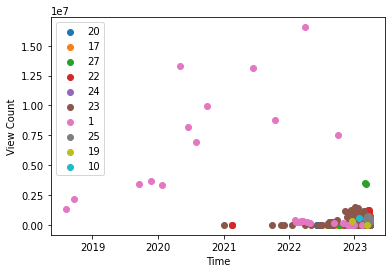

In [24]:
category_ = vid_data['category_id'].unique()

# Plot view count vs time for each user profile
for c in category_:
    subset = vid_data[vid_data['category_id'] == c]
    plt.scatter(subset['upload_time'], subset['view_count'], label=c)

subset = vid_data[vid_data['category_id'] == user_profiles[1]]

plt.xlabel('Time')
plt.ylabel('View Count')
plt.legend()

plt.show()